In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle
from matplotlib.ticker import MultipleLocator
import matplotlib.gridspec as gridspec

In [32]:
def price_graph(ax, df):
    size = 20
    a = 0.6

    ax.plot(df.ts, df.price, zorder=1)
    
    buy_data = df[df.action<0]
    ax.scatter(buy_data.ts, buy_data.price, color='g', s=size, alpha=a, zorder=2, marker='x')
    
    sell_data = df[df.action>0]
    ax.scatter(sell_data.ts, sell_data.price, color='r', s=size, alpha=a, zorder=3, marker='x')
    
    ax.set_ylabel('price')
    
def action_graph(ax, df):
    buy_data = df[df.action<0]
    ax.bar(buy_data.ts, buy_data.action, color='g')
    
    sell_data = df[df.action>0]
    ax.bar(sell_data.ts, sell_data.action, color='r')
    
    ax.set_ylabel('action')
    
def profit_graph(ax, df):    
    for e in np.unique(df.episode):
        e_df = df[df.episode==e]
        #a = e_df.profit.cumsum()
        ax.plot(e_df.ts, e_df.bank, color='orange')
    
    ax.set_ylabel('bank')
    ax.set_xlabel('time step')

def graph(df, spacing, title):
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,8), nrows=3, ncols=1, sharex=True, sharey=False)
    fig.suptitle(title, fontsize=16)
    
    price_graph(ax1, df)
    action_graph(ax2, df)
    profit_graph(ax3, df)
    

    minorLocator = MultipleLocator(spacing)
    for ax in [ax1,ax2,ax3]:
        ax.xaxis.set_minor_locator(minorLocator)
        ax.grid(which = 'minor')

# Reward: change in portfolio (unchanged)

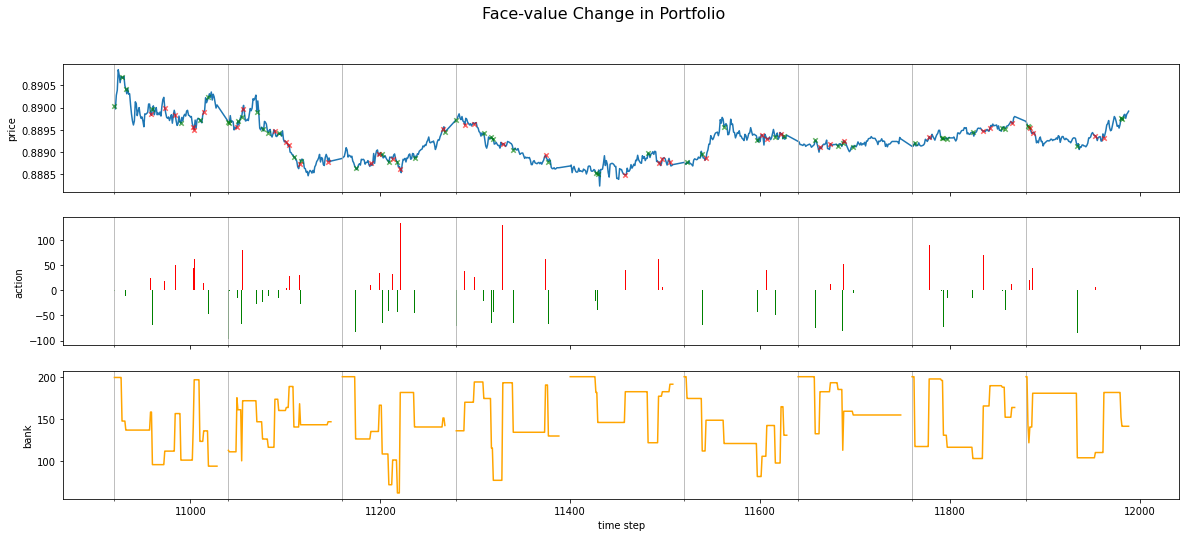

In [69]:
fname = "saved_data/reward_unchanged.pickle"
with open(fname, 'rb') as handle:
    r_unchanged = pickle.load(handle)

last = 10
ep = r_unchanged.episode.unique()[-last]
r_unchanged20 = r_unchanged[ r_unchanged.episode>ep]

graph(r_unchanged20, 120, 'Face-value Change in Portfolio')

# Reward: Only positive rewards

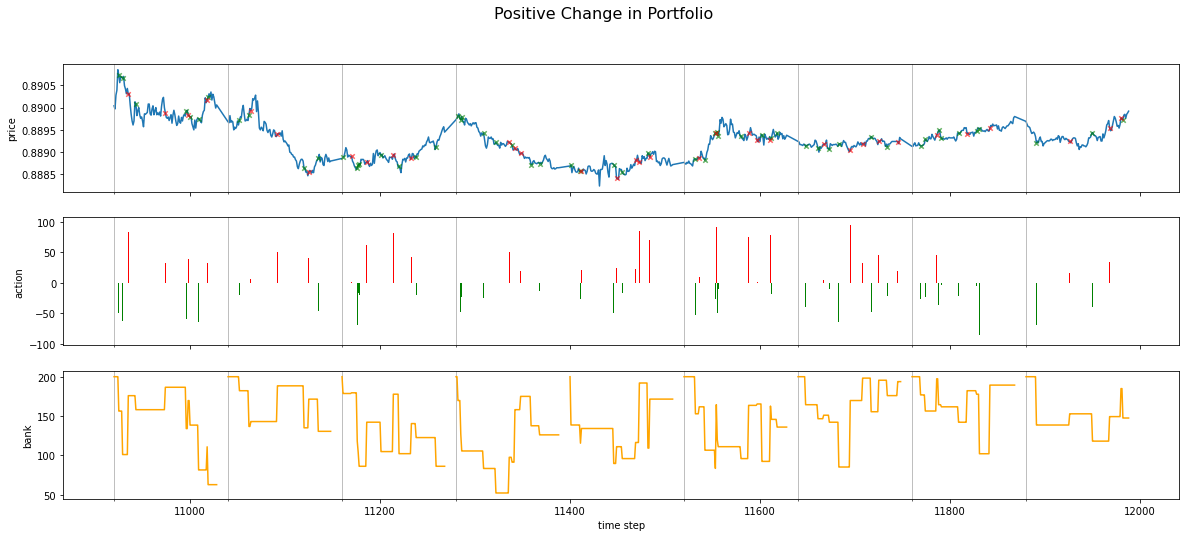

In [68]:
fname = "saved_data/reward_positive.pickle"
with open(fname, 'rb') as handle:
    r_positive = pickle.load(handle)
last = 10
ep = r_positive.episode.unique()[-last]
r_positive20 = r_positive[r_positive.episode>ep]

graph(r_positive20, 120, 'Positive Change in Portfolio')

# Reward: penalise a percentage on transaction

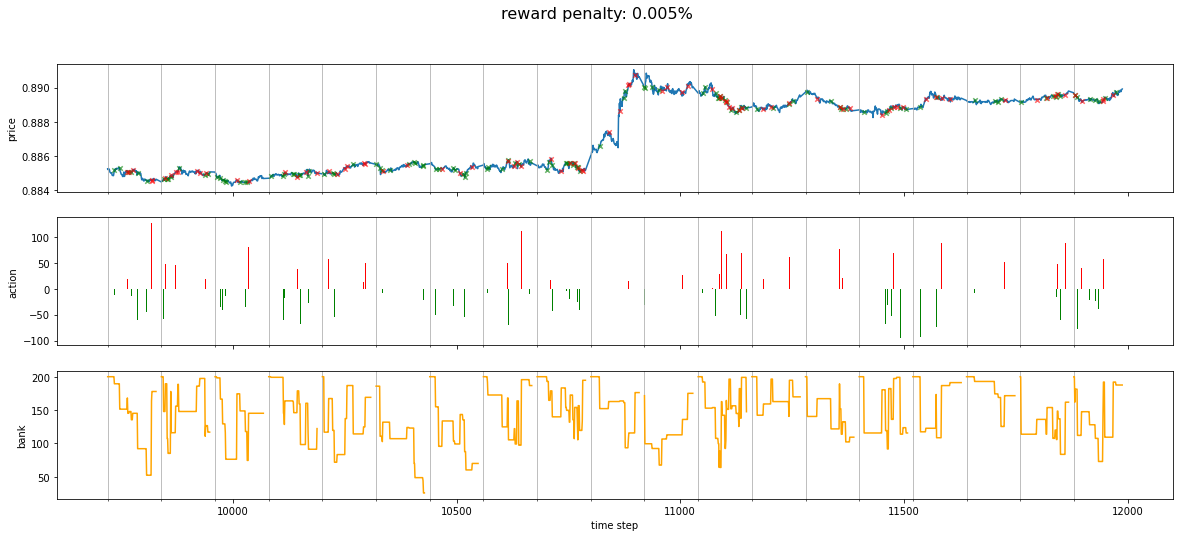

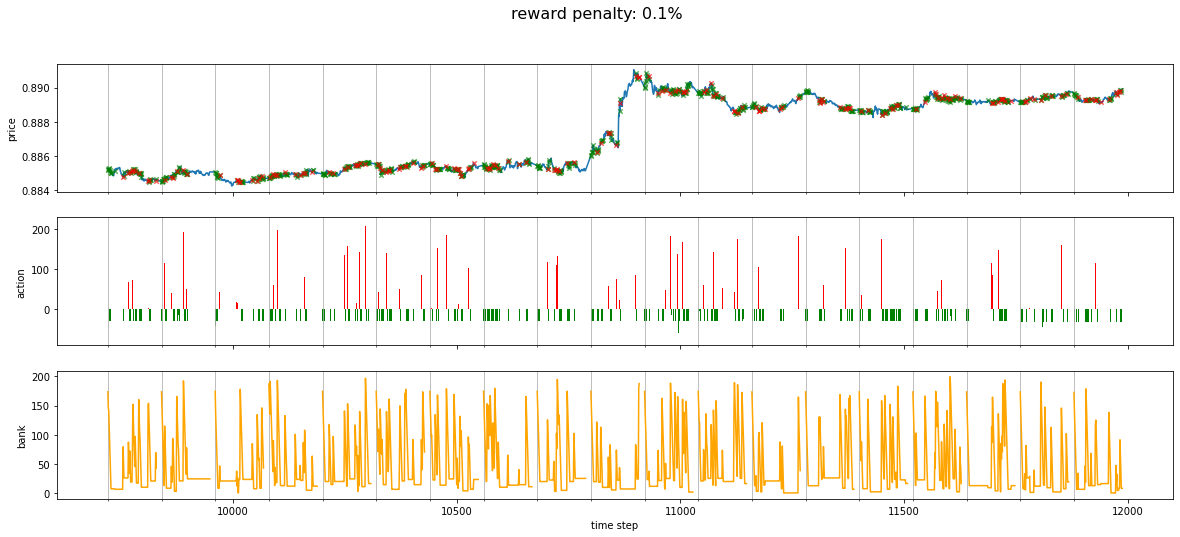

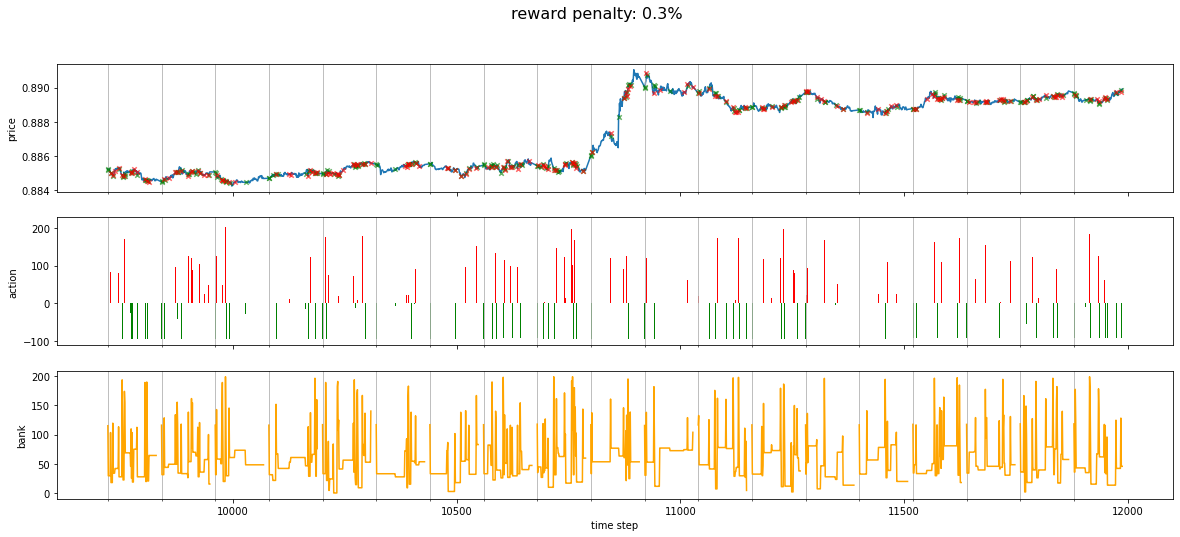

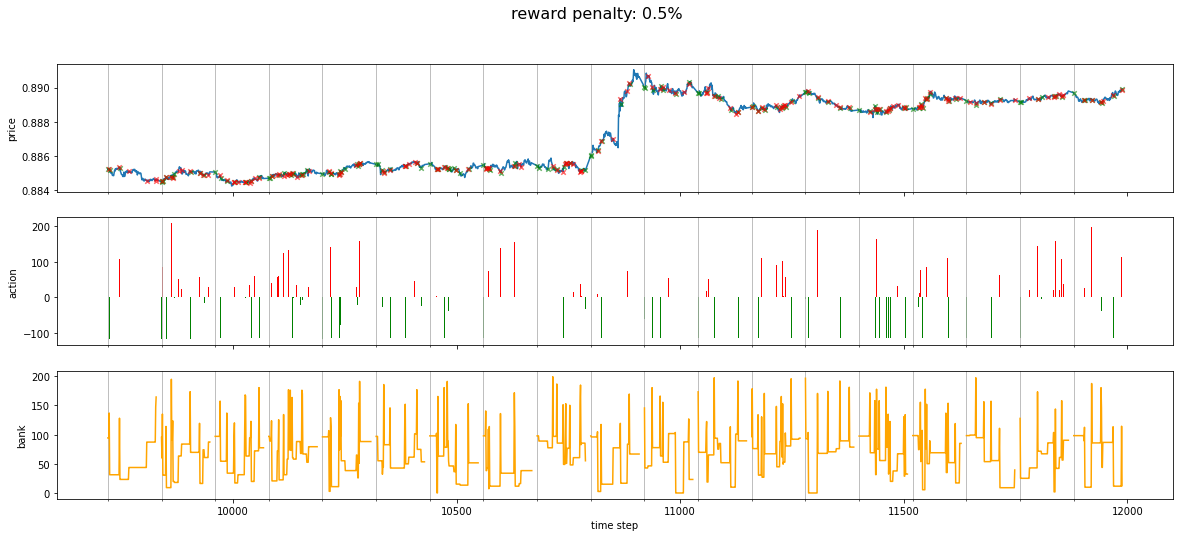

In [35]:
fname = "saved_data/reward_percent.pickle"
with open(fname, 'rb') as handle:
    r_percent = pickle.load(handle)
last = 20
ep = r_percent.episode.unique()[-last]
for percent in r_percent.reward_percent.unique():    
    r_percent20 = r_percent[ (r_percent.episode>ep) & (r_percent.reward_percent==percent)]

    graph(r_percent20, 120, 'reward penalty: '+str(percent)+'%')

<ipython-input-73-033282202055>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


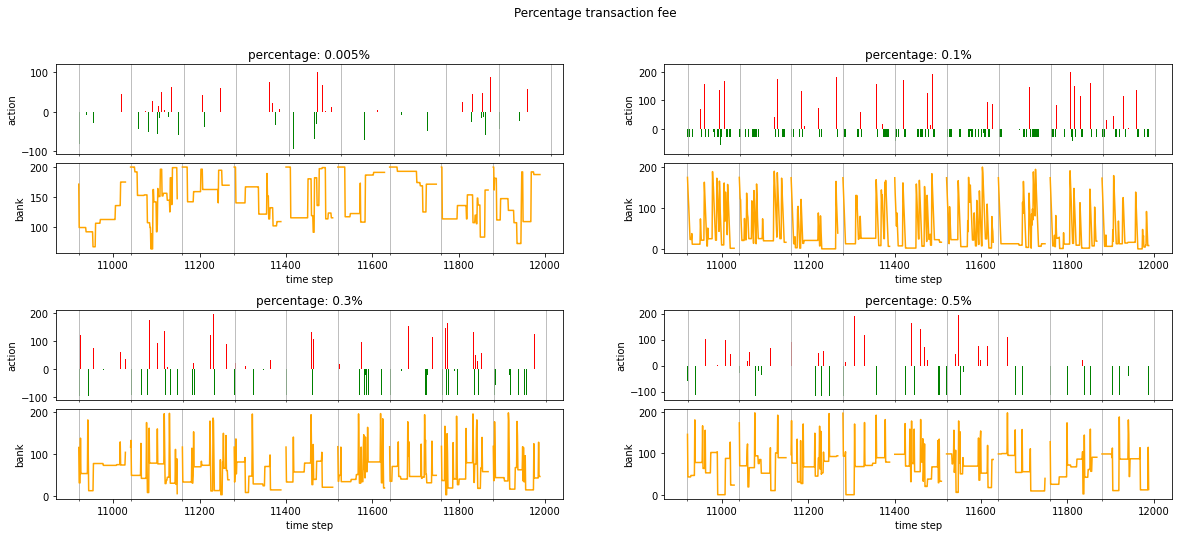

In [73]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Percentage transaction fee')
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.3)

last = 10
ep = r_percent.episode.unique()[-last]

for i,percent in enumerate(r_percent.reward_percent.unique()):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    r_percent20 = r_percent[ (r_percent.episode>ep) & (r_percent.reward_percent==percent)]
    
    ax0 = plt.Subplot(fig, inner[0])
    ax1 = plt.Subplot(fig, inner[1])
    
    action_graph(ax0, r_percent20)
    profit_graph(ax1, r_percent20)
    
    ax0.title.set_text('percentage: '+str(percent)+'%')
    ax0.set_xticks([])
    
    minorLocator = MultipleLocator(120)
    for ax in [ax1,ax0]:
        ax.xaxis.set_minor_locator(minorLocator)
        ax.grid(which = 'minor')
    
    fig.add_subplot(ax0)
    fig.add_subplot(ax1)

fig.show()

# Reward: penalise fixed amount for each transaction

In [61]:
fname = "saved_data/reward_fixed_ne.pickle"
with open(fname, 'rb') as handle:
    r_fixed = pickle.load(handle)

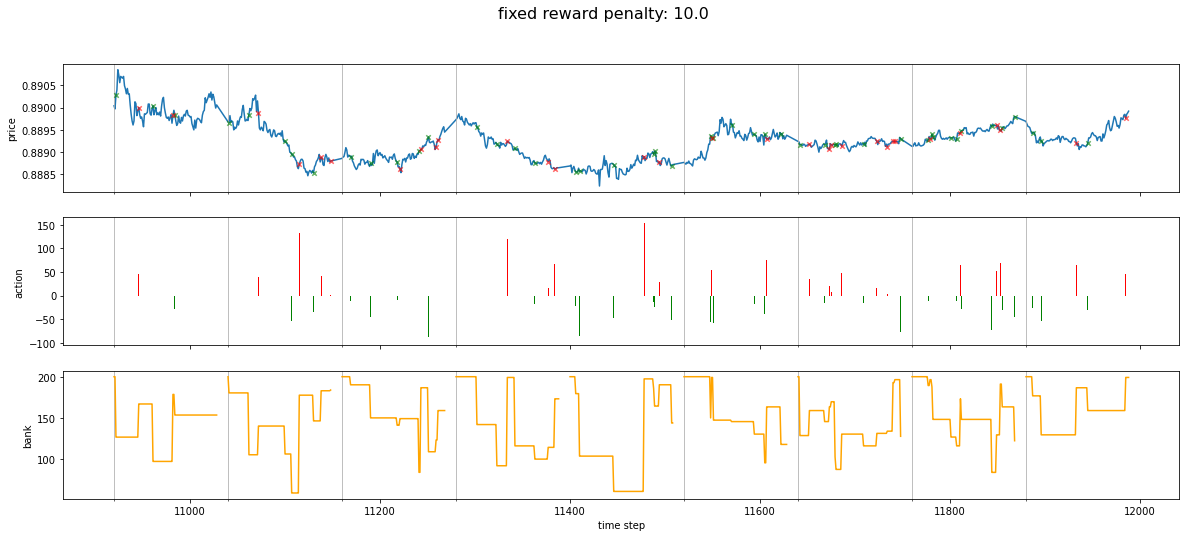

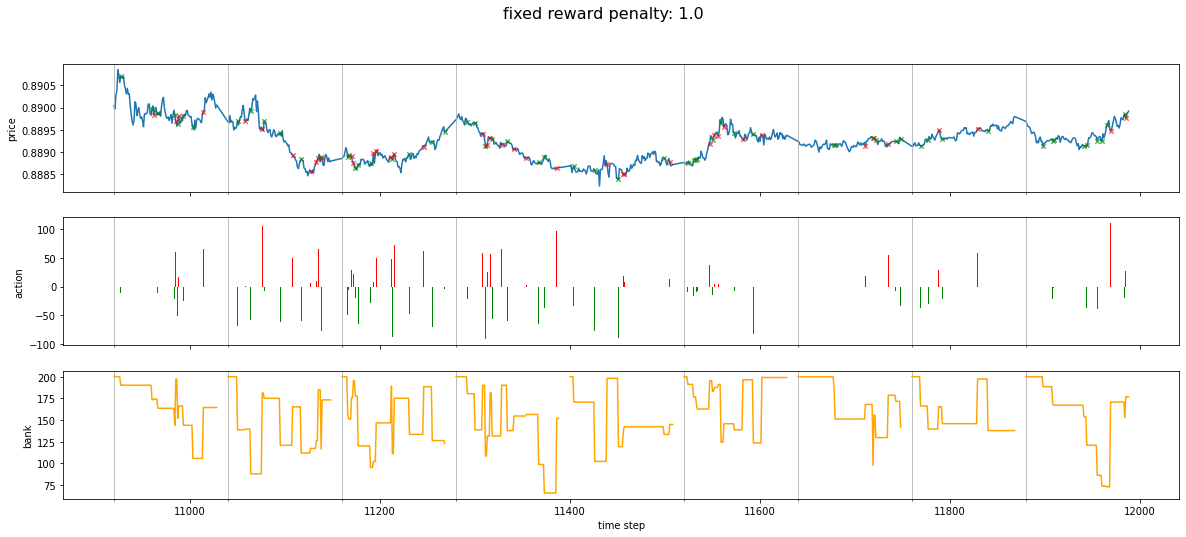

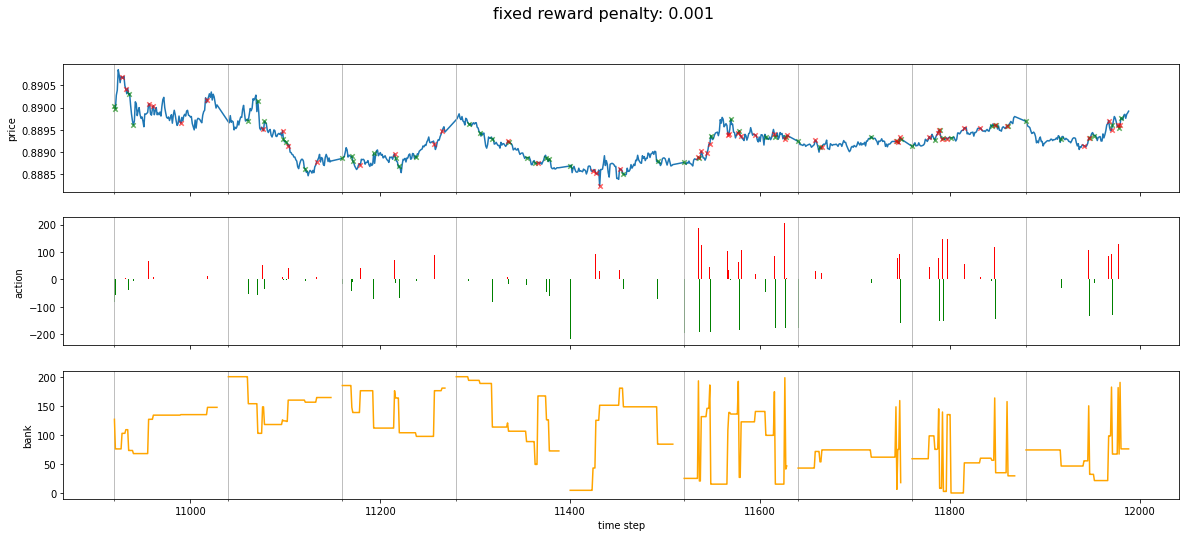

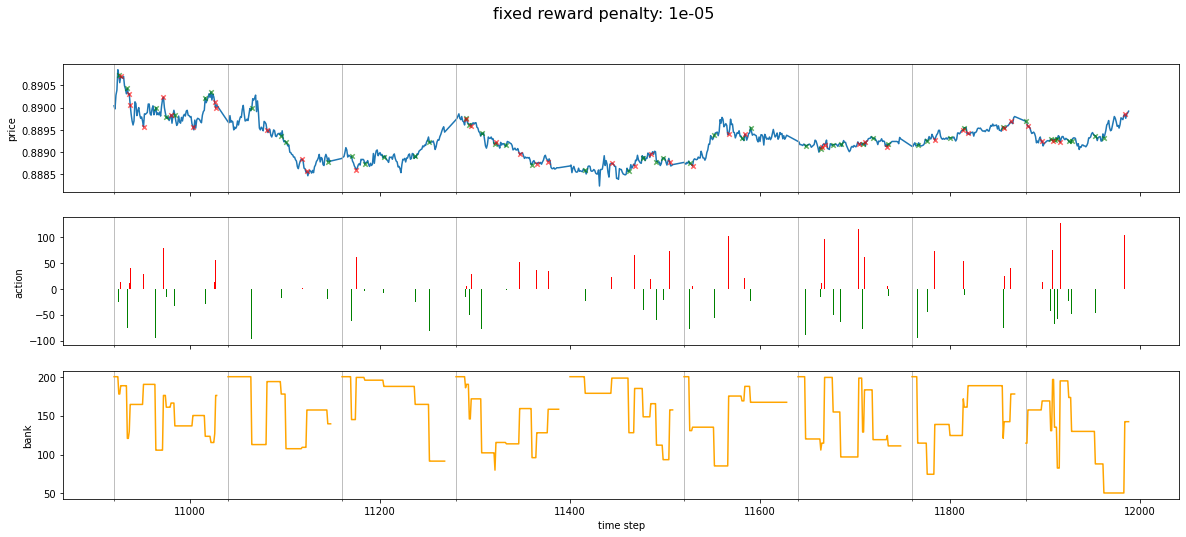

In [72]:
last = 10
ep = r_fixed.episode.unique()[-last]

for pen in r_fixed.penalty.unique():    
    r_fixed20 = r_fixed[ (r_fixed.episode>ep) & (r_fixed.penalty==pen)]

    graph(r_fixed20, 120, 'fixed reward penalty: '+str(pen))

<ipython-input-74-d6e9e0b0d333>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


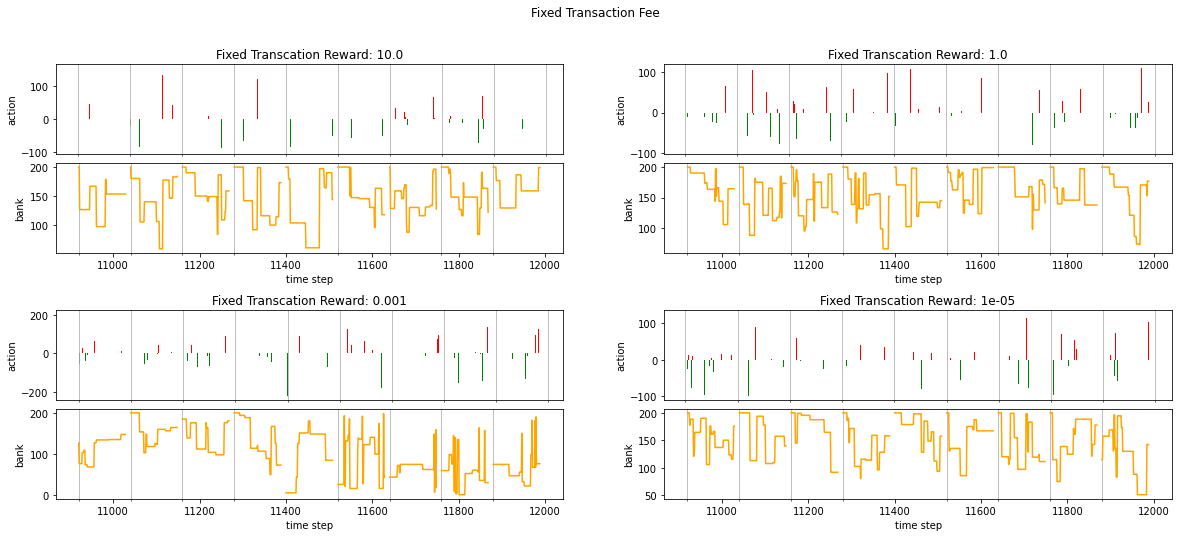

In [74]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Fixed Transaction Fee')
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.3)

last = 10
ep = r_fixed.episode.unique()[-last]

for i,fix in enumerate(r_fixed.penalty.unique()):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    r_fixed20 = r_fixed[ (r_fixed.episode>ep) & (r_fixed.penalty==fix)]
    
    ax0 = plt.Subplot(fig, inner[0])
    ax1 = plt.Subplot(fig, inner[1])
    
    action_graph(ax0, r_fixed20)
    profit_graph(ax1, r_fixed20)
    
    ax0.title.set_text('Fixed Transcation Reward: '+str(fix))
    ax0.set_xticks([])
    
    minorLocator = MultipleLocator(120)
    for ax in [ax1,ax0]:
        ax.xaxis.set_minor_locator(minorLocator)
        ax.grid(which = 'minor')
    
    fig.add_subplot(ax0)
    fig.add_subplot(ax1)

fig.show()